In [6]:
# Imports
from snn.Model import Model
from snn.LIF import LIF
from snn.Synapse import Synapse
import random
import networkx as nx

In [7]:
# Initial Model
model = Model([10, 2], LIF, Synapse)
first_pattern = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
second_pattern =[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

sorted([(key, model.synapses[key].weight) for key in model.synapses], key=lambda x: x[0][2])

[((0, 0, 0), 0.5402034223274143),
 ((0, 1, 0), 0.5974715697112326),
 ((0, 2, 0), 0.43053689592336625),
 ((0, 3, 0), 0.40850521380515137),
 ((0, 4, 0), 0.44332788117693106),
 ((0, 5, 0), 0.52241787130418),
 ((0, 6, 0), 0.5506073794780427),
 ((0, 7, 0), 0.4495256546226504),
 ((0, 8, 0), 0.48455453628279965),
 ((0, 9, 0), 0.5467489545366158),
 ((0, 0, 1), 0.5416662224298403),
 ((0, 1, 1), 0.489965733912948),
 ((0, 2, 1), 0.5547737816126712),
 ((0, 3, 1), 0.48783966734815015),
 ((0, 4, 1), 0.4746084576296148),
 ((0, 5, 1), 0.4743532176972712),
 ((0, 6, 1), 0.5315637424735049),
 ((0, 7, 1), 0.49054934254322724),
 ((0, 8, 1), 0.5937094820769219),
 ((0, 9, 1), 0.4981422195854797)]

In [8]:
def add_pattern_to_model(network, pattern, start_time):
    for index, spike in enumerate(pattern):
        if not spike: 
            continue
        network.add_spike_to_input(index, start_time + spike)

def add_random_noise(network, input_size, start_time, period=3):
    for i in range(input_size):
        will_spike = random.choice([True, False, False, False, False])
        if will_spike:
            spike_time = start_time + random.random() * period
            network.add_spike_to_input(i, spike_time)

In [9]:
def draw_network(network, scaling_factor=3):
    graph = nx.Graph()
    for layer, pre, post in network.synapses:
        graph.add_edge(pre, 10 + post, weight=network.synapses[layer, pre, post].weight)
    pos = nx.bipartite_layout(graph, [x for x in range(10)])
    weights = [graph[u][v]['weight'] * scaling_factor for u,v in graph.edges()]
    nx.draw(graph, pos, width=weights)

[((0, 0, 0), 1.0),
 ((0, 1, 0), 1.0),
 ((0, 2, 0), 1.0),
 ((0, 3, 0), 1.0),
 ((0, 4, 0), 0.4367278811769318),
 ((0, 5, 0), 0.5158178713041808),
 ((0, 6, 0), 0.5440073794780435),
 ((0, 7, 0), 0.4429256546226511),
 ((0, 8, 0), 0.4779545362828004),
 ((0, 9, 0), 0.5401489545366165),
 ((0, 0, 1), 1.0),
 ((0, 1, 1), 1.0),
 ((0, 2, 1), 1.0),
 ((0, 3, 1), 1.0),
 ((0, 4, 1), 0.4680084576296155),
 ((0, 5, 1), 0.4677532176972719),
 ((0, 6, 1), 0.5249637424735056),
 ((0, 7, 1), 0.48394934254322797),
 ((0, 8, 1), 0.5871094820769226),
 ((0, 9, 1), 0.49154221958548044)]

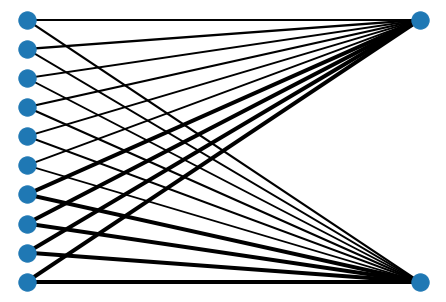

In [10]:
cycles = 50
time = 0
for _ in range(cycles):
    add_pattern_to_model(model, first_pattern, time)
    time = model.run()
    
    # add_random_noise(model, 10, time)
    # time = model.run()
    
    # add_pattern_to_model(model, second_pattern, time)
    # time = model.run()
    # 
    # add_random_noise(model, 10, time)
    # time = model.run()
    
draw_network(model, 4)
sorted([(key, model.synapses[key].weight) for key in model.synapses], key=lambda x: x[0][2])
